In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.proportion import power_proportions_2indep
 

In [31]:
res = power_proportions_2indep(0.02, 0.1, 100, alpha=0.05)
print(res.power) 

0.073588299245432


In [55]:
alphas = [0.05, 0.10, 0.15]
control_percentages = np.arange(0.02, 0.98, 0.02)
counts = np.arange(25, 1000, 25)
diffs = [0.02, 0.05, 0.10, 0.15]
results = {
    'alpha': [],
    'control_percentage': [],
    'count': [],
    'diff': [],
    'power': []
}
for _alpha in alphas:
    for _control_percentage in control_percentages:
        for _count in counts:
            for _diff in diffs:
                if _control_percentage + _diff > 1.0:
                    continue
                res = power_proportions_2indep(
                    diff=_diff,
                    prop2=_control_percentage,
                    nobs1=_count,
                    alpha=_alpha
                )
                results['alpha'].append(_alpha)
                results['count'].append(_count)
                results['diff'].append(_diff)
                results['control_percentage'].append(_control_percentage)
                results['power'].append(res.power)
res_df = pd.DataFrame(results) 

In [44]:
print(res_df.head(10), res_df.shape)

   alpha  control_percentage  count     power
0   0.05                0.02     25  0.279383
1   0.05                0.02     50  0.499906
2   0.05                0.02     75  0.673222
3   0.05                0.02    100  0.796010
4   0.05                0.02    125  0.877186
5   0.05                0.02    150  0.928214
6   0.05                0.02    175  0.959066
7   0.05                0.02    200  0.977146
8   0.05                0.02    225  0.987472
9   0.05                0.02    250  0.993241 (2565, 4)


0.05


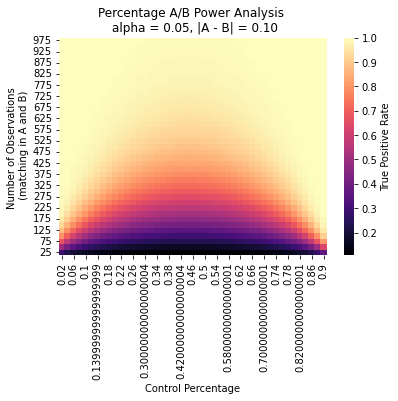

0.1


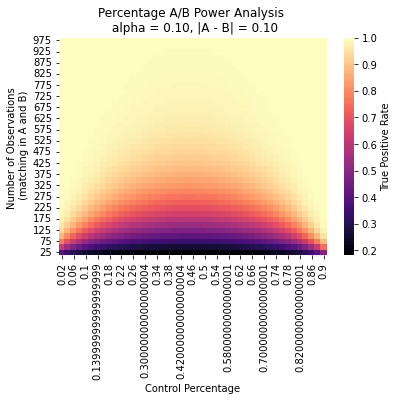

0.15


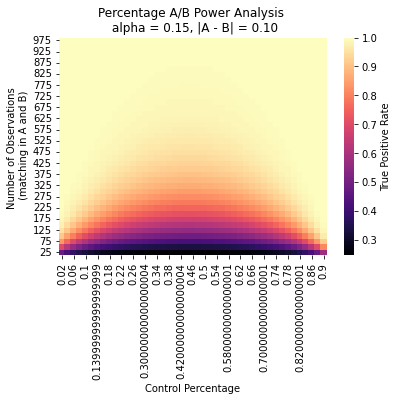

In [56]:
palette = sns.color_palette('Spectral', as_cmap=True)
#palette.reverse()
for _alpha in alphas:
    for _diff in diffs:
        print(_alpha, _diff)
        alpha_df = res_df.loc[(res_df['alpha'] == _alpha) & (res_df['diff'] == _diff)]
        heatmap_df = alpha_df[['control_percentage', 'count', 'power']].pivot(index='count', columns='control_percentage', values='power')
        fig = plt.figure()
        g = sns.heatmap(
            heatmap_df,
            cmap=palette,
            cbar_kws={'label':'True Positive Rate'}
        )
        g.invert_yaxis()
        plt.title(f'Percentage A/B Power Analysis \n alpha = {_alpha:.2f}, |A - B| = {_diff:.2f}')
        plt.ylabel('Number of Observations \n (matching in A and B)')
        plt.xlabel('Control Percentage')
        plt.show()